<a href="https://colab.research.google.com/github/Tndeal/GroverSearch/blob/main/GroverSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports
!pip install qiskit
!pip install qiskit_aer
!pip install qiskit_algorithms
!pip install qiskit_aer
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.circuit.library import GroverOperator
from qiskit_algorithms import AmplificationProblem, Grover
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler
from qiskit_aer import Aer
import math

In [ ]:
#list of numbers to search through and target number to find index of
list_numbers = [1, 2, 3, 4, 5, 6, 7]
target = 3

n = len(list_numbers)
#number of qubits needed to represent the values in the list
qubits = math.ceil(math.log2(n))

In [ ]:
#Grover Oracle

#creates the oracle that markes the target state
def create_oracle(list_numbers, target, qubits):
  #established the quantum circuit
  oracle = QuantumCircuit(qubits)
  binary_target = format(target, f'0{qubits}b')
  binary_index = format(list_numbers.index(target),f'0{qubits}b')

  #applying X gates to qubits where the target has a 0
  #this essentially flips the state of the qubit so that when we apply the Z gate we can identify the target
  for i, b in enumerate(binary_index):
    if b == '0':
      oracle.x(i)

  #apply a multi-controlled Z gate which phase flips on the target state
  #hadamard gate puts the auxiliary qubit in superposition
  oracle.h(qubits - 1)
  #flips the auxiliary qubit to |1> if all the control qubits are |1> (the target as from above)
  oracle.mcx(list(range(qubits-1)), qubits - 1)
  #transforms the state back, creating a phase flip on the target state as it changes the amplitude where the auxiliary is |1>
  oracle.h(qubits - 1)

  #undo the x gates to restore the qubits to original states (leaves other qubits unchanged)
  for i, b in enumerate(binary_index):
    if b == '0':
      oracle.x(i)

  oracle.name = "oracle"
  return oracle

In [ ]:
def is_good_state(bitstring):
    # Convert the bitstring to a decimal integer
    measured_value = int(bitstring, 2)
    # Check if the value in the list corresponds to the target number
    return list_numbers[measured_value] == target

<ipython-input-70-5f0cd3896b68>:11: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  grover = Grover(sampler=Sampler())


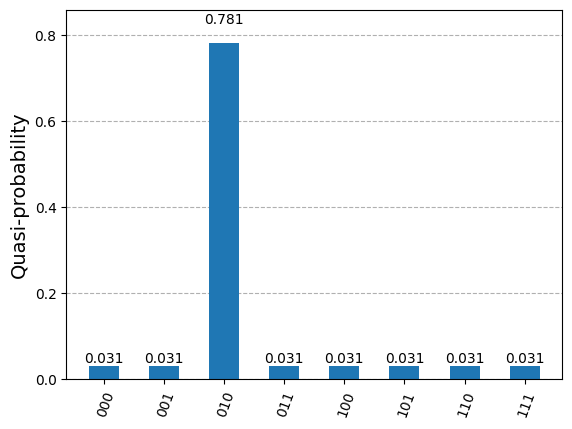

The index of the target number 3 is: 2


In [ ]:
oracle = create_oracle(list_numbers, target, qubits)

#creates a Grover operator using the library, which applies the algorithm
grover_operator = GroverOperator(oracle)
problem = AmplificationProblem(oracle=oracle, is_good_state = is_good_state)

#chooses a simulator to run the circuit
backend = Aer.get_backend('qasm_simulator')

#create Grover operator using library that combines the oracle and diffusion operator
grover = Grover(sampler=Sampler())
result = grover.amplify(problem)

#displays results
display(plot_histogram(result.circuit_results[0]))
most_likely_state = max(result.circuit_results[0], key=result.circuit_results[0].get)

# Convert binary result to an integer (index) and print the result
index_found = int(most_likely_state, 2)
print(f"The index of the target number {target} is: {index_found}")